In [1]:
import pandas as pd
clinical_cleaned = pd.read_csv('clinical_dataset_cleaned.csv')
clinical_cleaned.describe()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,activity_regular,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count,smoking_Current smoker,smoking_Never smoked,smoking_Past smoker (stopped at least 6 months)
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,2138.456274,0.785171,0.391635,76.980989,0.252852,0.538023,0.127376,1.629278,1.673004,0.081749,...,1.878327,3.794439,5.834601,26.950570,4.488593,0.306084,4.091255,0.093156,0.574144,0.332700
std,844.218483,0.728631,0.488580,5.881660,0.933371,1.192628,0.333712,0.570228,0.571975,0.274243,...,0.958384,7.222869,0.465189,5.603522,3.133059,0.763102,3.195717,0.290927,0.494943,0.471629
min,1001.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1134.250000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,6.000000,24.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2091.500000,1.000000,0.000000,76.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,2.000000,1.000000,6.000000,30.000000,4.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,3052.750000,1.000000,1.000000,80.750000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,...,3.000000,3.000000,6.000000,31.000000,6.000000,0.000000,6.000000,0.000000,1.000000,1.000000
max,3611.000000,2.000000,1.000000,95.000000,14.000000,14.000000,1.000000,2.000000,2.000000,1.000000,...,3.000000,63.000000,6.000000,31.000000,17.000000,7.000000,17.000000,1.000000,1.000000,1.000000


In [2]:
clinical_not_cleaned = pd.read_csv('clinical_dataset.csv',delimiter=';')

numerical_column_names = clinical_not_cleaned.select_dtypes(include=['int64','float64']).columns
print(numerical_column_names,len(numerical_column_names))

Index(['part_id', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'exhaustion_score', 'raise_chair_time',
       'gait_get_up', 'gait_speed_4m', 'falls_one_year',
       'fractures_three_years', 'bmi_score', 'bmi_body_fat', 'waist',
       'lean_body_mass', 'screening_score', 'cognitive_total_score',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'leisure_out', 'social_visits', 'social_calls', 'social_phone',
       'social_skype', 'social_text', 'stairs_number', 'life_quality',
       'pain_perception', 'alcohol_units', 'katz_index', 'iadl_grade',
       'comorbidities_count', 'comorbidities_significant_count',
       'medication_count'],
      dtype='object') 34


array([[<Axes: title={'center': 'part_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hospitalization_one_year'}>,
        <Axes: title={'center': 'hospitalization_three_years'}>,
        <Axes: title={'center': 'exhaustion_score'}>,
        <Axes: title={'center': 'raise_chair_time'}>],
       [<Axes: title={'center': 'gait_get_up'}>,
        <Axes: title={'center': 'gait_speed_4m'}>,
        <Axes: title={'center': 'falls_one_year'}>,
        <Axes: title={'center': 'fractures_three_years'}>,
        <Axes: title={'center': 'bmi_score'}>,
        <Axes: title={'center': 'bmi_body_fat'}>],
       [<Axes: title={'center': 'waist'}>,
        <Axes: title={'center': 'lean_body_mass'}>,
        <Axes: title={'center': 'screening_score'}>,
        <Axes: title={'center': 'cognitive_total_score'}>,
        <Axes: title={'center': 'mmse_total_score'}>,
        <Axes: title={'center': 'depression_total_score'}>],
       [<Axes: title={'center': 'anxiety_percep

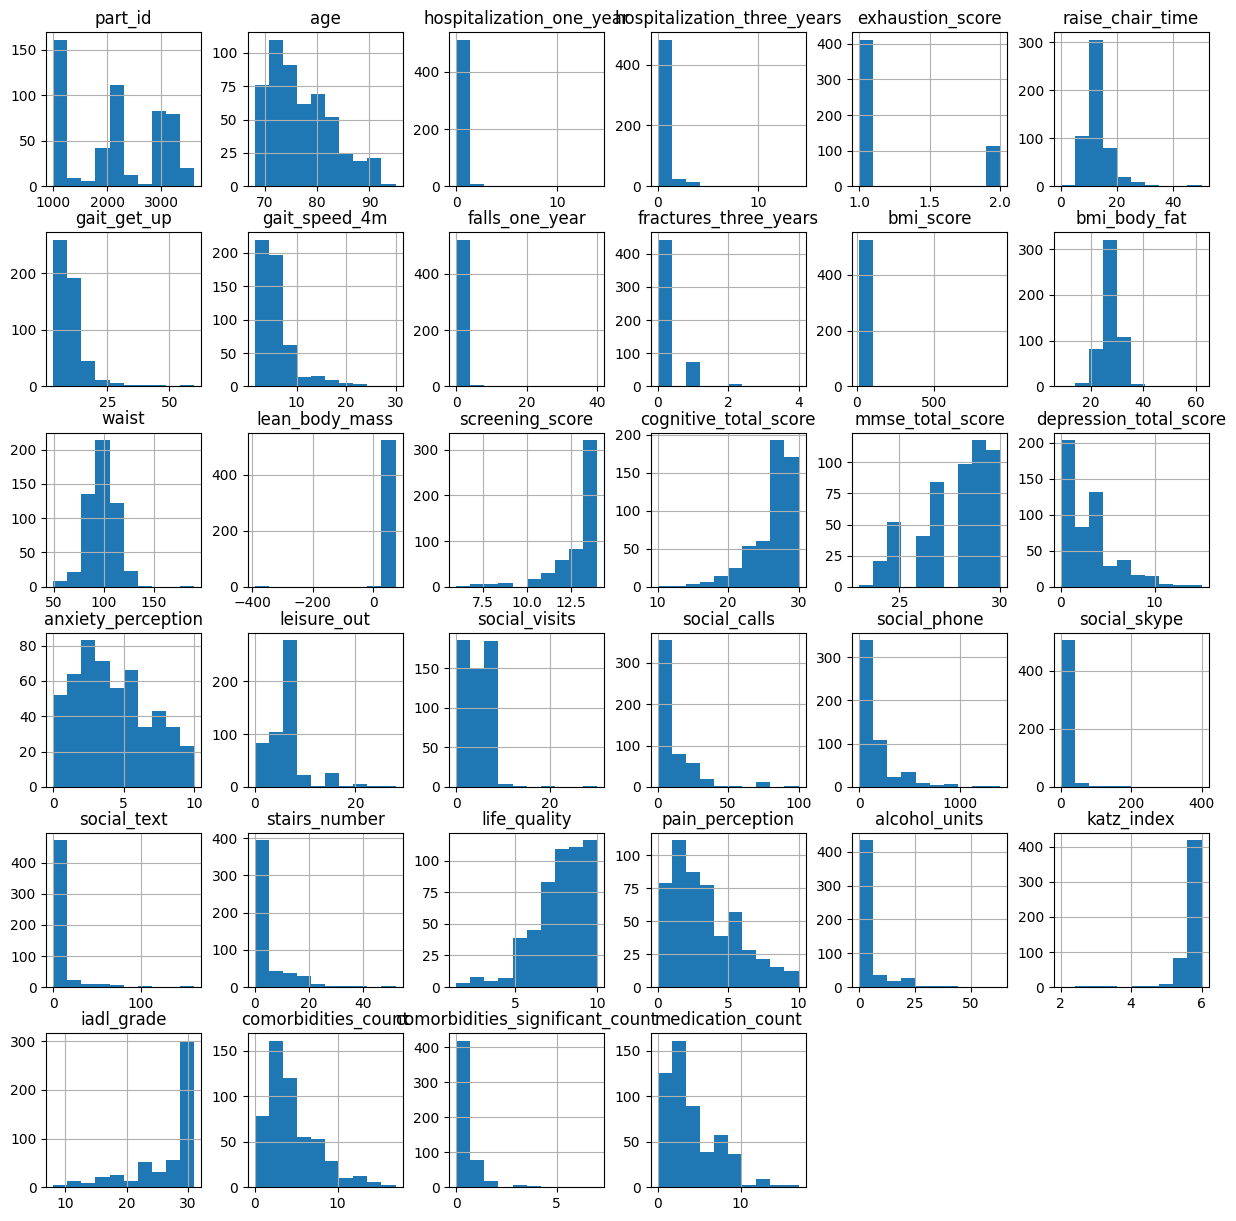

In [3]:
clinical_cleaned[numerical_column_names].hist(figsize=(15,15), bins=10)

### The histograms and the results from the .describe() function suggest that there some differences in scales, so it would be best to scale the features before training.

In [4]:
#no need to train on part_id it is just an index for the rows-users
clinical_cleaned.drop(columns=['part_id'],inplace=True) 

#we drop the features used to to generate the fried categorization
clinical_cleaned.drop(columns=['weight_loss', 'exhaustion_score', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity'],inplace=True) 




### Before scaling we need to split the dataset into train set and test set. It's important to scale the features separately for the training and testing sets with the scaler trained on the train set, rather than scaling the whole dataset at once. This ensures that we don't introduce data leakage from the test set into the training process and that the scaling parameters are learned only from the training data.

In [5]:
clinical_cleaned['fried'].value_counts()

fried
1    223
0    208
2     95
Name: count, dtype: int64

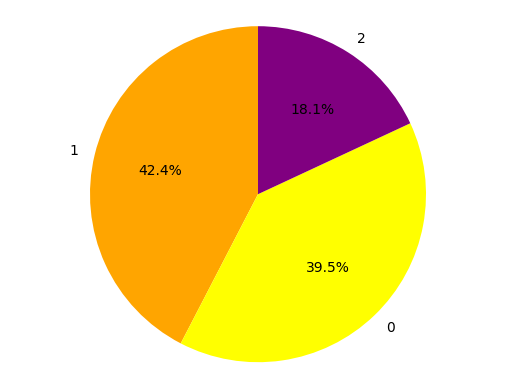

In [6]:
import matplotlib.pyplot as plt

labels= clinical_cleaned['fried'].value_counts().index

colors=['orange', 'yellow', 'purple']

sizes= clinical_cleaned['fried'].value_counts()

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()


### There is a class imbalance between classes 1, 0 and class 2. Class imbalance can lead to models not being able to correctly predict the minority classes as there were not enough of them passed to the model in the training phase. Furthermore, considering that class 2 is the most important class out of all (we do not want to misclassify Frail elder people because they have an increased risk of having a major adverse life event which we aim to forestall). We will have to deal with the class imbalance in some way.

In [7]:
y=clinical_cleaned['fried']
X= clinical_cleaned.drop(columns=['fried'])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
y_train.value_counts()

fried
1    154
0    149
2     65
Name: count, dtype: int64

### We randomly split the dataset, which due to the class imbalance mentioned above might result to a lower percentage of class 2 instances in the train set , compared to the original dataset, but it seems that is not happening here , so we can continue with our analysis.

### StandardScaler() implements standard scaling by removing the mean and scaling to unit variance.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



### A RandomForestClassifier is trained and evaluated on the train set using cross validation.

rfc               precision    recall  f1-score   support

           0       0.67      0.74      0.71       149
           1       0.57      0.66      0.61       154
           2       0.72      0.28      0.40        65

    accuracy                           0.62       368
   macro avg       0.65      0.56      0.57       368
weighted avg       0.64      0.62      0.61       368



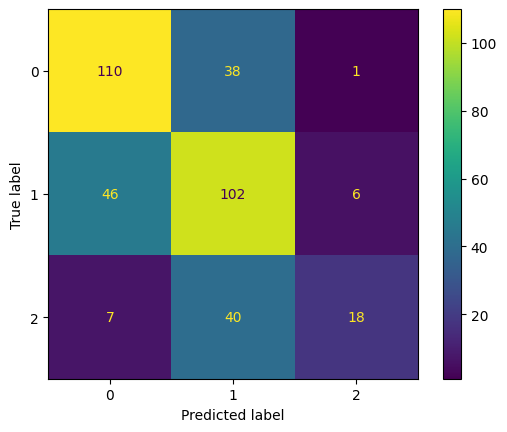

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)

y_train_pred = cross_val_predict(rfc, X_train_scaled, y_train, cv=5)

cm = confusion_matrix( y_train, y_train_pred)

ConfusionMatrixDisplay(cm, display_labels=rfc.classes_).plot()
print('rfc',classification_report(y_train, y_train_pred))






### We are not satisfied with the performance of the classifier because it has a low recall (0.28) on class 2 aka 'Frail', meaning it will miss 72% of frail people when classifying them and this is definately something we do not want. Frail class is the most important class of all three because Frail elder people are are in danger of exhibiting severe health issues and that is something we must prevent by correctly predicting as many as possible of this cases.

### The class imbalance is most likely the reason (only 18.2% of the instances belong to class 2). In order to deal with this imbalance there are two ways, we either undersample the majority classes or we oversample the minority class. Undersampling means that we have to drop rows belonging to class 0 and 1. This is not the best tactic because our dataset is already limited (we only have 368 training instances) and even if we had a big dataset and that was no problem, droping instances might lead to models with higher bias. This is why we prefer to oversample the minority class 2 by using the algorithm SMOTE (Synthetic Minority Oversampling Technique). Oversampling the minority class using SMOTE means that we create new synhtetic data belonging to class 2.

### The SMOTE algorithm explained: A random data point of the minority class is chosen. Then, k of it's nearest neighbors are found (k=5 in our case). Out of these k neighbors, one is randomly chosen and a new synthetic data point is created at a randomly selected point between the instance and the neighbor in the feature space.

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


### Training and evalauting a RandomForestClassifier on the oversampled dataset.

rfc_oversampled               precision    recall  f1-score   support

           0       0.65      0.74      0.69       149
           1       0.60      0.53      0.56       154
           2       0.86      0.85      0.86       154

    accuracy                           0.71       457
   macro avg       0.71      0.71      0.70       457
weighted avg       0.71      0.71      0.70       457



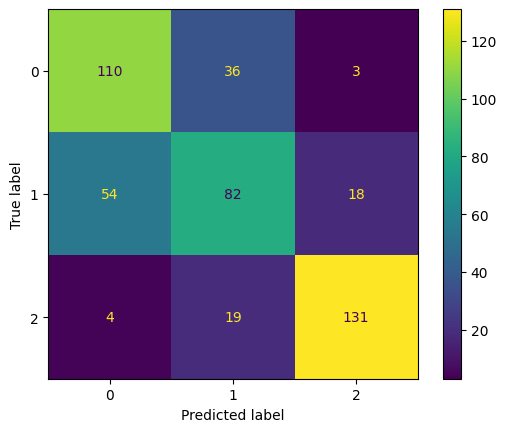

In [13]:
rfc_oversampled = RandomForestClassifier()
rfc_oversampled.fit(X_train_resampled,y_train_resampled)

y_train_pred = cross_val_predict(rfc_oversampled, X_train_resampled, y_train_resampled, cv=5)

cm = confusion_matrix( y_train_resampled, y_train_pred)

ConfusionMatrixDisplay(cm, display_labels=rfc_oversampled.classes_).plot()
print('rfc_oversampled',classification_report(y_train_resampled, y_train_pred))




### As we can see, there is a huge improvement in the performance on the model regarding class 2, while retaining a similar performance on the other classes - there is a 13% drop in the recall of class 1 - but that is a price we are willing to pay for the huge increase in performance in the more important class 2. 

### Can a different model provide better results? Testing an SVM classifier:

svc               precision    recall  f1-score   support

           0       0.58      0.85      0.69       149
           1       0.50      0.49      0.50       154
           2       0.89      0.51      0.64       154

    accuracy                           0.61       457
   macro avg       0.66      0.62      0.61       457
weighted avg       0.66      0.61      0.61       457



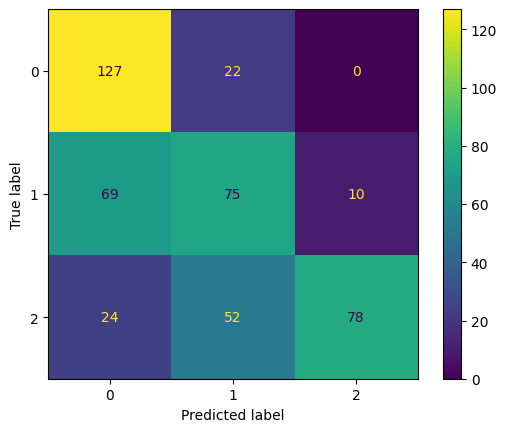

In [14]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')
svc.fit(X_train_resampled, y_train_resampled)

y_train_pred = cross_val_predict(svc, X_train_resampled, y_train_resampled, cv=5)

cm = confusion_matrix( y_train_resampled, y_train_pred)

ConfusionMatrixDisplay(cm, display_labels=svc.classes_).plot()
print('svc',classification_report(y_train_resampled, y_train_pred))



### The performance of the Random Forest Classifier is overall better then the performance of the Support Vector Classifier.

### Testing the RandomForestClassifier on the test set.

rfc_oversampled_test               precision    recall  f1-score   support

           0       0.73      0.76      0.74        59
           1       0.64      0.68      0.66        69
           2       0.78      0.60      0.68        30

    accuracy                           0.70       158
   macro avg       0.72      0.68      0.70       158
weighted avg       0.70      0.70      0.70       158



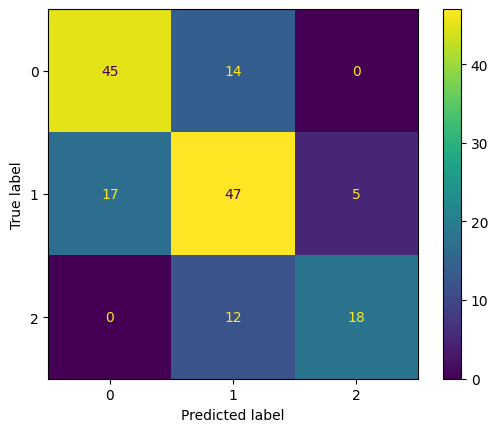

In [15]:

y_test_pred = rfc_oversampled.predict(X_test_scaled)


cm = confusion_matrix( y_test, y_test_pred)

ConfusionMatrixDisplay(cm, display_labels=rfc_oversampled.classes_).plot()
print('rfc_oversampled_test', classification_report(y_test, y_test_pred))



### We see that the metrics on the test set are worse when it comes to class 2 (for the other two classes they are better).This might be because the model is overfitting class 2, or because of the size of the test set used. When the test set is significantly smaller than the training set or the cross-validation folds, performance metrics may be less stable and more sensitive to the specific data points in the test set. Small test sets can lead to more variability in model performance. In conclusion, there is definitely room for improvement but even at it is current state, the model can be a useful assistive tool for the diagnosis of frailty in elderly patients.